In [2]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
import io

In [4]:
# Carregar os dados
@st.cache_data
def load_data():
    return pd.read_csv("/content/bank-additional-full.csv", delimiter=';')

bank_raw = load_data()

2024-10-13 22:20:04.198 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-10-13 22:20:04.201 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:04.302 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-13 22:20:04.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:04.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:04.311 No runtime found, using MemoryCacheStorageManager
2024-10-13 22:20:04.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:04.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored wh

In [5]:
# Configuração da página
st.set_page_config(page_title="Análise Bancária", layout="wide")

2024-10-13 22:20:07.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [6]:
# Layout principal
col1, col2 = st.columns([1, 3])

2024-10-13 22:20:09.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:09.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:09.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [7]:
# Coluna de filtros
with col1:
    st.image("/content/Bank-Branding.jpg", use_column_width=True)

    # Exemplo de slider para filtrar por idade
    age_range = st.slider("Faixa etária",
                          min_value=int(bank_raw['age'].min()),
                          max_value=int(bank_raw['age'].max()),
                          value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))


2024-10-13 22:20:23.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:23.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2024-10-13 22:20:25.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:26.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:26.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:26.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:26.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

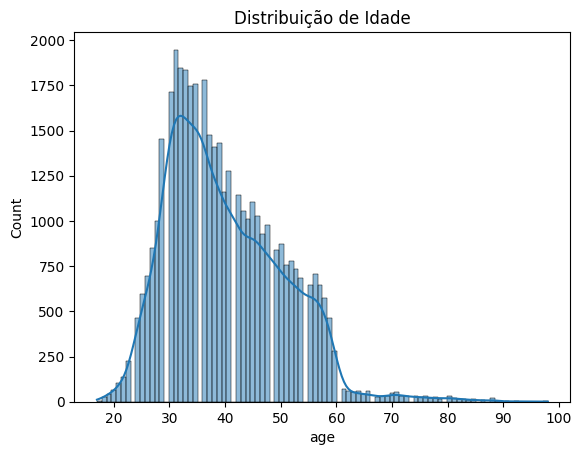

In [8]:
# Coluna do gráfico
with col2:
    # Filtrar os dados
    filtered_data = bank_raw[(bank_raw['age'] >= age_range[0]) & (bank_raw['age'] <= age_range[1])]

    # Criar o gráfico
    fig, ax = plt.subplots()
    sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
    ax.set_title("Distribuição de Idade")

    # Exibir o gráfico
    st.pyplot(fig)

# Exibir os dados filtrados
st.dataframe(filtered_data)

In [9]:
# Colunas de filtros
col1, col2 = st.columns(2)

with col1:
    # Slider para faixa etária
    age_range = st.slider("Faixa etária",
                          min_value=int(bank_raw['age'].min()),
                          max_value=int(bank_raw['age'].max()),
                          value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

    # Multiselect para tipo de trabalho
    job_options = ['all'] + list(bank_raw['job'].unique())
    selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

with col2:
    # Multiselect para estado civil
    marital_options = ['all'] + list(bank_raw['marital'].unique())
    selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

    # Multiselect para nível de educação
    education_options = ['all'] + list(bank_raw['education'].unique())
    selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

2024-10-13 22:20:29.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:29.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [10]:
# Filtrar os dados
filtered_data = bank_raw[(bank_raw['age'] >= age_range[0]) & (bank_raw['age'] <= age_range[1])]

if 'all' not in selected_jobs:
    filtered_data = filtered_data[filtered_data['job'].isin(selected_jobs)]
if 'all' not in selected_marital:
    filtered_data = filtered_data[filtered_data['marital'].isin(selected_marital)]
if 'all' not in selected_education:
    filtered_data = filtered_data[filtered_data['education'].isin(selected_education)]

In [11]:
# Criar e exibir o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
ax.set_title("Distribuição de Idade")
st.pyplot(fig)

# Exibir os dados filtrados
st.dataframe(filtered_data)

2024-10-13 22:20:34.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:35.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:35.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:35.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:35.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [12]:
# Configuração do tema do Seaborn
sns.set_theme(style="whitegrid")

In [13]:
# Layout principal
st.image("/content/telmarketing_icon.png", use_column_width=True)

2024-10-13 22:20:39.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:39.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:39.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [14]:
# Formulário para filtros
with st.form("filter_form"):
    st.header("Filtros")

    col1, col2 = st.columns(2)

    with col1:
        age_range = st.slider("Faixa etária",
                              min_value=int(bank_raw['age'].min()),
                              max_value=int(bank_raw['age'].max()),
                              value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

        job_options = ['all'] + list(bank_raw['job'].unique())
        selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

    with col2:
        marital_options = ['all'] + list(bank_raw['marital'].unique())
        selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

        education_options = ['all'] + list(bank_raw['education'].unique())
        selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

    submit_button = st.form_submit_button("Aplicar Filtros")

2024-10-13 22:20:41.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:41.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [15]:
# Lógica para filtrar os dados
if submit_button:
    filtered_data = bank_raw[(bank_raw['age'] >= age_range[0]) & (bank_raw['age'] <= age_range[1])]

    if 'all' not in selected_jobs:
        filtered_data = filtered_data[filtered_data['job'].isin(selected_jobs)]
    if 'all' not in selected_marital:
        filtered_data = filtered_data[filtered_data['marital'].isin(selected_marital)]
    if 'all' not in selected_education:
        filtered_data = filtered_data[filtered_data['education'].isin(selected_education)]

    # Criar e exibir o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
    ax.set_title("Distribuição de Idade")
    st.pyplot(fig)

    # Exibir os dados filtrados
    st.dataframe(filtered_data)
else:
    st.info("Por favor, selecione os filtros desejados e clique em 'Aplicar Filtros'.")

2024-10-13 22:20:44.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:44.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
pip install --upgrade streamlit

In [ ]:
pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [16]:
# Configuração do tema do Seaborn usando cache_resource
@st.cache_resource
def set_seaborn_theme():
    sns.set_theme(style="whitegrid")

set_seaborn_theme()

# Carregar os dados usando cache_data
@st.cache_data
def load_data():
    return pd.read_csv("/content/bank-additional-full.csv", delimiter=';')

bank_raw = load_data()


2024-10-13 22:20:49.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.546 No runtime found, using MemoryCacheStorageManager
2024-10-13 22:20:49.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:49.553 Thread 'MainThread':

In [17]:
# Função para filtrar dados (usando cache_data)
@st.cache_data
def filter_data(df, age_range, jobs, marital, education):
    filtered = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

    if 'all' not in jobs:
        filtered = filtered[filtered['job'].isin(jobs)]
    if 'all' not in marital:
        filtered = filtered[filtered['marital'].isin(marital)]
    if 'all' not in education:
        filtered = filtered[filtered['education'].isin(education)]

    return filtered

2024-10-13 22:20:51.885 No runtime found, using MemoryCacheStorageManager


In [18]:
# Formulário para filtros
with st.form("filter_form"):
    st.header("Filtros")

    col1, col2 = st.columns(2)

    with col1:
        age_range = st.slider("Faixa etária",
                              min_value=int(bank_raw['age'].min()),
                              max_value=int(bank_raw['age'].max()),
                              value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

        job_options = ['all'] + list(bank_raw['job'].unique())
        selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

    with col2:
        marital_options = ['all'] + list(bank_raw['marital'].unique())
        selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

        education_options = ['all'] + list(bank_raw['education'].unique())
        selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

    submit_button = st.form_submit_button("Aplicar Filtros")

# Lógica para filtrar os dados e criar o gráfico
if submit_button:
    filtered_data = filter_data(bank_raw, age_range, selected_jobs, selected_marital, selected_education)

    # Criar e exibir o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
    ax.set_title("Distribuição de Idade")
    st.pyplot(fig)

    # Exibir os dados filtrados
    st.dataframe(filtered_data)
else:
    st.info("Por favor, selecione os filtros desejados e clique em 'Aplicar Filtros'.")

2024-10-13 22:20:57.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:20:57.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [19]:
# Configuração do tema do Seaborn
@st.cache_resource
def set_seaborn_theme():
    sns.set_theme(style="whitegrid")

set_seaborn_theme()

# Função para carregar dados
@st.cache_data
def load_data(file):
    return pd.read_csv(file, delimiter=';')

2024-10-13 22:21:01.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:01.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:01.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:01.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:01.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:01.028 No runtime found, using MemoryCacheStorageManager


In [20]:
# Função para filtrar dados
@st.cache_data
def filter_data(df, age_range, jobs, marital, education):
    filtered = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

    if 'all' not in jobs:
        filtered = filtered[filtered['job'].isin(jobs)]
    if 'all' not in marital:
        filtered = filtered[filtered['marital'].isin(marital)]
    if 'all' not in education:
        filtered = filtered[filtered['education'].isin(education)]

    return filtered

2024-10-13 22:21:02.967 No runtime found, using MemoryCacheStorageManager


In [21]:
# Layout principal
st.title("Análise de Dados Bancários")

# File uploader
uploaded_file = st.file_uploader("/content/bank-additional-full-40.csv", type="csv")

2024-10-13 22:21:04.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:04.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [22]:
if uploaded_file is not None:
    # Carregar dados do arquivo enviado
    bank_raw = load_data(uploaded_file)

    # Formulário para filtros
    with st.form("filter_form"):
        st.header("Filtros")

        col1, col2 = st.columns(2)

        with col1:
            age_range = st.slider("Faixa etária",
                                  min_value=int(bank_raw['age'].min()),
                                  max_value=int(bank_raw['age'].max()),
                                  value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

            job_options = ['all'] + list(bank_raw['job'].unique())
            selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

        with col2:
            marital_options = ['all'] + list(bank_raw['marital'].unique())
            selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

            education_options = ['all'] + list(bank_raw['education'].unique())
            selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

        submit_button = st.form_submit_button("Aplicar Filtros")


In [23]:
 # Lógica para filtrar os dados e criar o gráfico
if submit_button:
    filtered_data = filter_data(bank_raw, age_range, selected_jobs, selected_marital, selected_education)

 # Criar e exibir o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
    ax.set_title("Distribuição de Idade")
    st.pyplot(fig)

 # Exibir os dados filtrados
    st.dataframe(filtered_data)
else:
    st.info("Por favor, selecione os filtros desejados e clique em 'Aplicar Filtros'.")

2024-10-13 22:21:08.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:08.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [24]:
# Função para filtrar dados
@st.cache_data
def filter_data(df, age_range, jobs, marital, education):
    filtered = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

    if 'all' not in jobs:
        filtered = filtered[filtered['job'].isin(jobs)]
    if 'all' not in marital:
        filtered = filtered[filtered['marital'].isin(marital)]
    if 'all' not in education:
        filtered = filtered[filtered['education'].isin(education)]

    return filtered

2024-10-13 22:21:10.741 No runtime found, using MemoryCacheStorageManager


In [25]:
# Função para converter dataframe para CSV
@st.cache_data
def convert_df_to_csv(df):
    return df.to_csv(index=False).encode('utf-8')

# Layout principal
st.title("Análise de Dados Bancários")

# File uploader
uploaded_file = st.file_uploader("Escolha um arquivo CSV", type="csv")

if uploaded_file is not None:
    # Carregar dados do arquivo enviado
    bank_raw = load_data(uploaded_file)

    # Formulário para filtros
    with st.form("filter_form"):
        st.header("Filtros")

        col1, col2 = st.columns(2)

        with col1:
            age_range = st.slider("Faixa etária",
                                  min_value=int(bank_raw['age'].min()),
                                  max_value=int(bank_raw['age'].max()),
                                  value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

            job_options = ['all'] + list(bank_raw['job'].unique())
            selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

        with col2:
            marital_options = ['all'] + list(bank_raw['marital'].unique())
            selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

            education_options = ['all'] + list(bank_raw['education'].unique())
            selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

        submit_button = st.form_submit_button("Aplicar Filtros")

2024-10-13 22:21:13.145 No runtime found, using MemoryCacheStorageManager
2024-10-13 22:21:13.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:13.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [26]:
# Lógica para filtrar os dados e criar o gráfico
if submit_button:
        filtered_data = filter_data(bank_raw, age_range, selected_jobs, selected_marital, selected_education)

        # Criar e exibir o gráfico
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(data=filtered_data, x='age', kde=True, ax=ax)
        ax.set_title("Distribuição de Idade")
        st.pyplot(fig)

        # Exibir os dados filtrados
        st.dataframe(filtered_data)

        # Botão de download para os dados filtrados
        csv = convert_df_to_csv(filtered_data)
        st.download_button(
            label="Download dos dados filtrados",
            data=csv,
            file_name="dados_filtrados.csv",
            mime="text/csv",
        )
else:
    st.info("Por favor, selecione os filtros desejados e clique em 'Aplicar Filtros'.")

2024-10-13 22:21:15.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:15.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [27]:
if uploaded_file is not None:
    # Carregar dados do arquivo enviado
    bank_raw = load_data(uploaded_file)

    # Formulário para filtros
    with st.form("filter_form"):
        st.header("Filtros")

        col1, col2 = st.columns(2)

        with col1:
            age_range = st.slider("Faixa etária",
                                  min_value=int(bank_raw['age'].min()),
                                  max_value=int(bank_raw['age'].max()),
                                  value=(int(bank_raw['age'].min()), int(bank_raw['age'].max())))

            job_options = ['all'] + list(bank_raw['job'].unique())
            selected_jobs = st.multiselect("Tipo de trabalho", options=job_options, default=['all'])

        with col2:
            marital_options = ['all'] + list(bank_raw['marital'].unique())
            selected_marital = st.multiselect("Estado civil", options=marital_options, default=['all'])

            education_options = ['all'] + list(bank_raw['education'].unique())
            selected_education = st.multiselect("Nível de educação", options=education_options, default=['all'])

In [28]:
# Radio button para escolher a variável do gráfico
plot_variable = st.radio(
            "Escolha a variável para visualizar:",
            ('age', 'balance', 'duration', 'campaign')
        )

submit_button = st.form_submit_button("Aplicar Filtros")

2024-10-13 22:21:19.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.898 Session state does not function when running a script without `streamlit run`
2024-10-13 22:21:19.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:19.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21

In [29]:
# Lógica para filtrar os dados e criar o gráfico
if submit_button:
        filtered_data = filter_data(bank_raw, age_range, selected_jobs, selected_marital, selected_education)

        # Criar e exibir o gráfico
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(data=filtered_data, x=plot_variable, kde=True, ax=ax)
        ax.set_title(f"Distribuição de {plot_variable}")
        st.pyplot(fig)

        # Exibir os dados filtrados
        st.dataframe(filtered_data)

        # Botão de download para os dados filtrados
        csv = convert_df_to_csv(filtered_data)
        st.download_button(
            label="Download dos dados filtrados",
            data=csv,
            file_name="dados_filtrados.csv",
            mime="text/csv",
        )
else:
        st.info("Por favor, selecione os filtros desejados e clique em 'Aplicar Filtros'.")

2024-10-13 22:21:22.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 22:21:22.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
